### Load CSVs into Pandas

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv("Dataset/movies.csv")
movies.head()

,movie_id,movie_title,genres
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror


In [3]:
ratings = pd.read_csv("Dataset/ratings.csv")
ratings.head()

,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,1381006850
1,2,102926,9,1590148016
2,2,208092,5,1586466072
3,2,358273,9,1579057827
4,2,10039344,5,1578603053


### Connect SQL with Jupyter Notebook

In [5]:
# Load the SQL extension
%load_ext sql

# Connect to a new SQLite database (creates movie_analysis.db in the current folder)
%sql sqlite:///movie_analysis.db

### Load CSVs into SQL Tables

In [7]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("movie_analysis.db")

# Save to SQL
movies.to_sql("movies", conn, if_exists="replace", index=False)
ratings.to_sql("ratings", conn, if_exists="replace", index=False)

877563

### Check Tables in SQL

In [9]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///movie_analysis.db
Done.


name
movies
ratings


### Explore Data Using SQL

#### Movies with "Horror" in Genre

In [12]:
%%sql
SELECT * FROM movies WHERE genres LIKE '%Horror%' LIMIT 5;

 * sqlite:///movie_analysis.db
Done.


movie_id,movie_title,genres
91,Le manoir du diable (1896),Short|Horror
131,Une nuit terrible (1896),Short|Comedy|Horror
1223,Frankenstein (1910),Short|Horror|Sci-Fi
2130,L'inferno (1911),Adventure|Drama|Fantasy|Horror
10323,Das Cabinet des Dr. Caligari (1920),Fantasy|Horror|Mystery|Thriller


#### Count of Ratings per Movie

In [14]:
%%sql
SELECT movie_id, COUNT(*) AS rating_count
FROM ratings
GROUP BY movie_id
ORDER BY rating_count DESC
LIMIT 5;

 * sqlite:///movie_analysis.db
Done.


movie_id,rating_count
1454468,3099
816692,2914
8579674,2834
993846,2812
7286456,2714


#### Count of Ratings per User

In [16]:
%%sql
SELECT user_id, COUNT(*) AS total_ratings
FROM ratings
GROUP BY user_id
ORDER BY total_ratings DESC
LIMIT 5;

 * sqlite:///movie_analysis.db
Done.


user_id,total_ratings
16548,2875
25641,2070
38928,1924
66303,1770
66591,1606


#### 10 Top-Rated Movies

In [18]:
%%sql
SELECT m.movie_title, COUNT(r.rating) AS num_ratings, ROUND(AVG(r.rating), 2) AS avg_rating
FROM ratings r
JOIN movies m ON r.movie_id = m.movie_id
GROUP BY r.movie_id
HAVING COUNT(r.rating) >= 10
ORDER BY avg_rating DESC
LIMIT 10;

 * sqlite:///movie_analysis.db
Done.


movie_title,num_ratings,avg_rating
Five Minutes (2017),22,10.0
Avengers: Age of Ultron Parody (2015),28,10.0
MSG 2 the Messenger (2015),48,10.0
Selam (2013),10,10.0
Be Somebody (2016),353,9.99
Birlesen Gonuller (2014),17,9.88
The Sky Is Pink (2019),22,9.45
Bridegroom (2013),14,9.43
Dag II (2016),36,9.42
Chasing Coral (2017),10,9.4


#### 10 Lowest Rated Movies

In [20]:
%%sql
SELECT m.movie_title, COUNT(r.rating) AS num_ratings, ROUND(AVG(r.rating), 2) AS avg_rating
FROM ratings r
JOIN movies m ON r.movie_id = m.movie_id
GROUP BY r.movie_id
HAVING COUNT(r.rating) >= 10
ORDER BY avg_rating ASC
LIMIT 10;

 * sqlite:///movie_analysis.db
Done.


movie_title,num_ratings,avg_rating
Kod Adi K.O.Z. (2015),30,1.0
The Rat (2019),96,1.73
Disaster Movie (2008),18,1.89
Thunderheart (1992),15,2.13
Keith Lemon: The Film (2012),21,2.14
Dragonball Evolution (2009),19,2.16
Gallowwalkers (2012),26,2.27
Battlefield Earth (2000),17,2.35
Apartment 1303 3D (2012),23,2.43
Reis (2016),36,2.5


#### Number of Movies per Genre Combination

In [22]:
%%sql
SELECT genres, COUNT(DISTINCT movie_id) AS num_movies
FROM movies
GROUP BY genres
ORDER BY num_movies DESC
LIMIT 10;

 * sqlite:///movie_analysis.db
Done.


genres,num_movies
Drama,3677
Comedy,2138
Documentary,1490
Comedy|Drama,1394
Drama|Romance,1207
Comedy|Drama|Romance,994
Comedy|Romance,856
Horror,838
Horror|Thriller,573
Drama|Thriller,509


#### Top 5 Highest Rated Movie Genres

In [24]:
%%sql
SELECT m.genres, ROUND(AVG(r.rating), 2) AS avg_rating
FROM movies m
JOIN ratings r ON m.movie_id = r.movie_id
GROUP BY m.genres
ORDER BY avg_rating DESC
LIMIT 5;

 * sqlite:///movie_analysis.db
Done.


genres,avg_rating
Short|Music|Musical,10.0
Short|Fantasy|Thriller,10.0
Short|Fantasy|Sci-Fi|Thriller,10.0
Short|Crime|Mystery,10.0
Short|Crime|Horror|Thriller,10.0


#### Top 5 Lowest Rated Movie Genres

In [26]:
%%sql
SELECT m.genres, ROUND(AVG(r.rating), 2) AS avg_rating
FROM movies m
JOIN ratings r ON m.movie_id = r.movie_id
GROUP BY m.genres
ORDER BY avg_rating ASC
LIMIT 5;

 * sqlite:///movie_analysis.db
Done.


genres,avg_rating
Action|Adventure|Crime|Mystery|Romance,1.0
Action|Adventure|Drama|Family,1.0
Action|Adventure|Drama|Family|Fantasy|Romance|Sci-Fi,1.0
Action|Adventure|Horror|Mystery|Sci-Fi|Thriller|War,1.0
Action|Comedy|Crime|Drama|Sci-Fi|Thriller,1.0


#### Number of Ratings per Year

In [28]:
%%sql
SELECT strftime('%Y', datetime(rating_timestamp, 'unixepoch')) AS year,
       COUNT(*) AS num_ratings
FROM ratings
GROUP BY year
ORDER BY year;

 * sqlite:///movie_analysis.db
Done.


year,num_ratings
2013,170807
2014,156354
2015,123644
2016,112455
2017,105987
2018,81870
2019,74183
2020,52263


#### Distribution of Ratings

In [30]:
%%sql
SELECT rating, COUNT(*) AS count
FROM ratings
GROUP BY rating
ORDER BY rating;

 * sqlite:///movie_analysis.db
Done.


rating,count
0,267
1,10324
2,8778
3,14759
4,26940
5,65907
6,114372
7,196410
8,211699
9,124459


In [31]:
import warnings
warnings.filterwarnings('ignore')

### Merge Datasets using Python (Pandas)

In [33]:
df = pd.merge(ratings, movies, on='movie_id', how='left')
df.head()

,user_id,movie_id,rating,rating_timestamp,movie_title,genres
0,1,114508,8,1381006850,Species (1995),Action|Horror|Sci-Fi|Thriller
1,2,102926,9,1590148016,The Silence of the Lambs (1991),Crime|Drama|Thriller
2,2,208092,5,1586466072,Snatch (2000),Comedy|Crime
3,2,358273,9,1579057827,Walk the Line (2005),Biography|Drama|Music|Romance
4,2,10039344,5,1578603053,Countdown (2019),Horror|Thriller


### Extract Release Year using Regex

In [35]:
import re

df['release_year'] = df['movie_title'].str.extract(r'\((\d{4})\)').astype(int)
df.head()

,user_id,movie_id,rating,rating_timestamp,movie_title,genres,release_year
0,1,114508,8,1381006850,Species (1995),Action|Horror|Sci-Fi|Thriller,1995
1,2,102926,9,1590148016,The Silence of the Lambs (1991),Crime|Drama|Thriller,1991
2,2,208092,5,1586466072,Snatch (2000),Comedy|Crime,2000
3,2,358273,9,1579057827,Walk the Line (2005),Biography|Drama|Music|Romance,2005
4,2,10039344,5,1578603053,Countdown (2019),Horror|Thriller,2019


### Convert rating_timestamp to rating_date and Extract Year

In [37]:
df['rating_date'] = pd.to_datetime(df['rating_timestamp'], unit='s')
df['rating_year'] = df['rating_date'].dt.year
df.drop(columns = 'rating_timestamp', inplace = True)
df.head()

,user_id,movie_id,rating,movie_title,genres,release_year,rating_date,rating_year
0,1,114508,8,Species (1995),Action|Horror|Sci-Fi|Thriller,1995,2013-10-05 21:00:50,2013
1,2,102926,9,The Silence of the Lambs (1991),Crime|Drama|Thriller,1991,2020-05-22 11:46:56,2020
2,2,208092,5,Snatch (2000),Comedy|Crime,2000,2020-04-09 21:01:12,2020
3,2,358273,9,Walk the Line (2005),Biography|Drama|Music|Romance,2005,2020-01-15 03:10:27,2020
4,2,10039344,5,Countdown (2019),Horror|Thriller,2019,2020-01-09 20:50:53,2020


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878273 entries, 0 to 878272
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       878273 non-null  int64         
 1   movie_id      878273 non-null  int64         
 2   rating        878273 non-null  int64         
 3   movie_title   878273 non-null  object        
 4   genres        877857 non-null  object        
 5   release_year  878273 non-null  int32         
 6   rating_date   878273 non-null  datetime64[ns]
 7   rating_year   878273 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(2)
memory usage: 46.9+ MB


### Split and Explode Genres into Separate Rows

In [40]:
df['genres'] = df['genres'].fillna('Unknown').str.split('|')
df_exploded = df.explode('genres')
df_exploded.head()

,user_id,movie_id,rating,movie_title,genres,release_year,rating_date,rating_year
0,1,114508,8,Species (1995),Action,1995,2013-10-05 21:00:50,2013
0,1,114508,8,Species (1995),Horror,1995,2013-10-05 21:00:50,2013
0,1,114508,8,Species (1995),Sci-Fi,1995,2013-10-05 21:00:50,2013
0,1,114508,8,Species (1995),Thriller,1995,2013-10-05 21:00:50,2013
1,2,102926,9,The Silence of the Lambs (1991),Crime,1991,2020-05-22 11:46:56,2020


In [41]:
df_exploded.shape

(2680491, 8)

In [42]:
df_exploded['genres'].value_counts()

genres
Drama          489327
Thriller       304621
Action         277654
Comedy         233243
Adventure      223375
Sci-Fi         176666
Crime          176026
Romance        122374
Mystery        112024
Fantasy        108584
Biography       88904
Horror          87663
Family          57420
War             44153
Animation       40353
History         37935
Music           26933
Sport           21586
Documentary     15697
Musical         15532
Western         14903
Short            2786
Film-Noir        1800
News              487
Unknown           416
Adult              12
Reality-TV          9
Talk-Show           7
Game-Show           1
Name: count, dtype: int64

### Genre Distribution

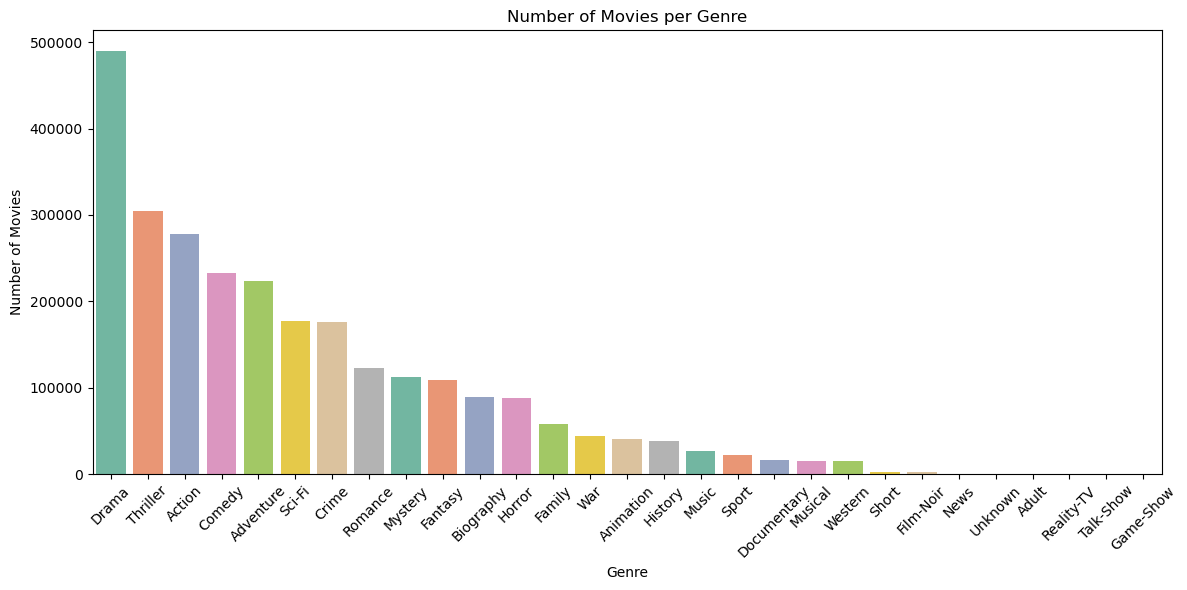

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count number of movies per genre
movies_per_genre = df_exploded['genres'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_genre.index, y=movies_per_genre.values, palette='Set2')

plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Rating Distribution

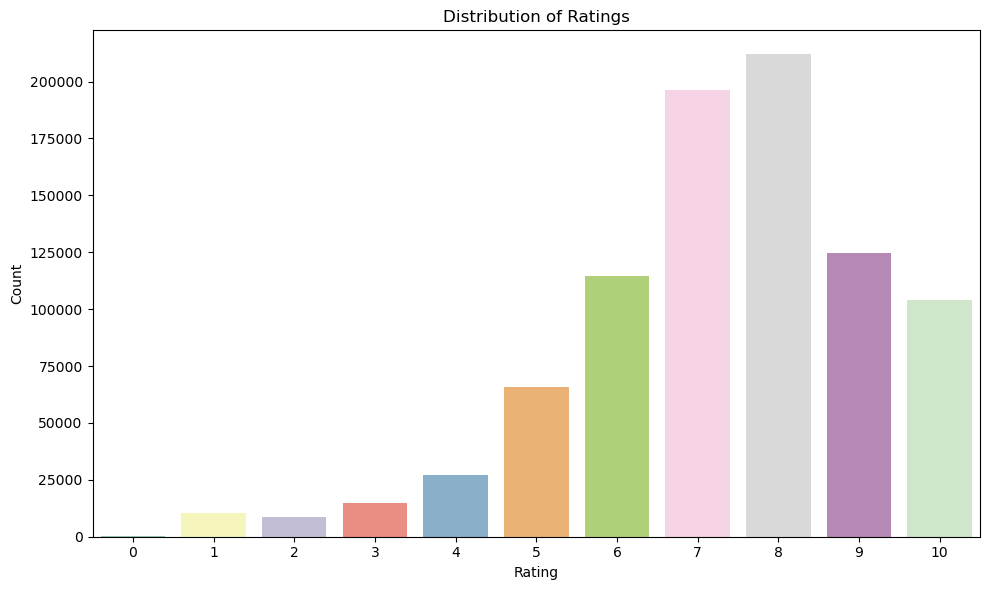

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='Set3')

plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Number of Ratings per Year

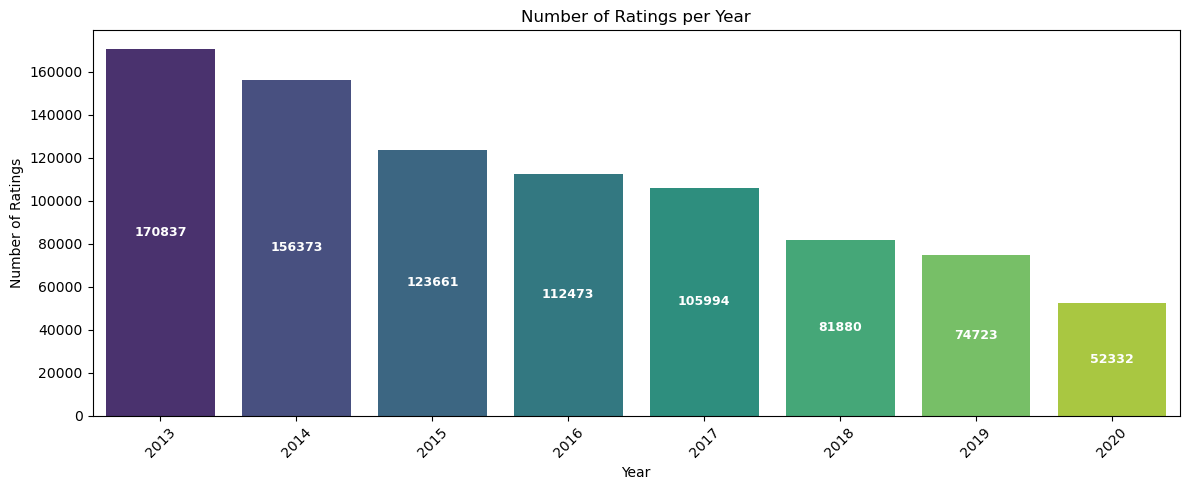

In [48]:
# Count number of ratings per year
ratings_per_year = df['rating_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=ratings_per_year.index, y=ratings_per_year.values, palette='viridis')

# Add labels inside bars
for i, (x, y) in enumerate(zip(ratings_per_year.index, ratings_per_year.values)):
    ax.text(i, y * 0.5, f'{y}', ha='center', va='center', color='white', fontsize=9, fontweight='bold')
    
plt.title('Number of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Rating per Year

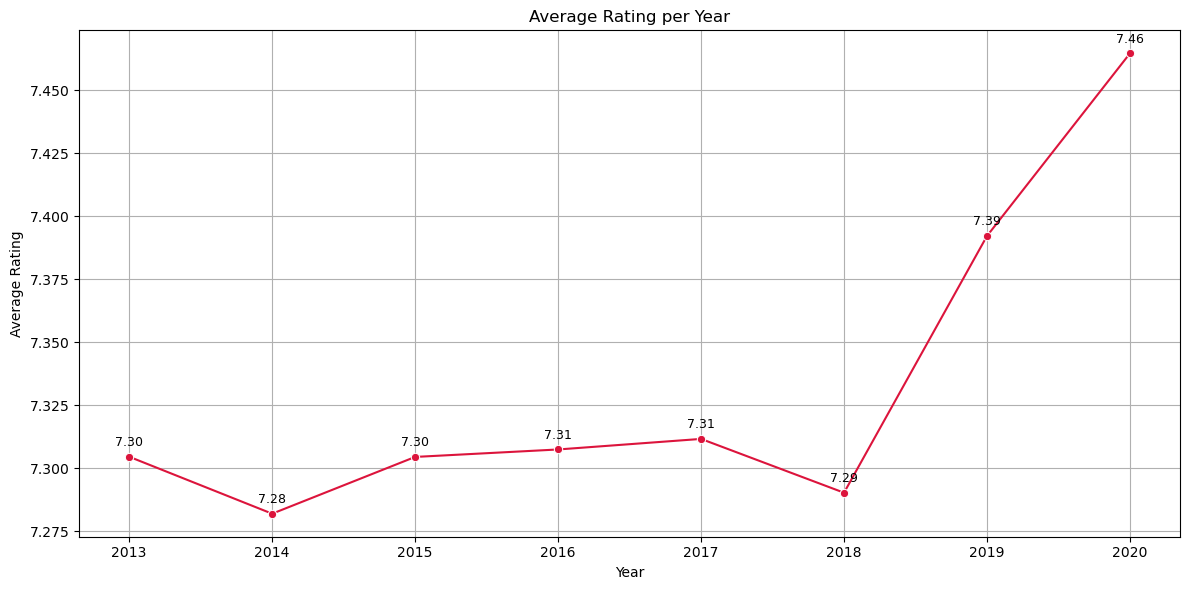

In [50]:
avg_rating_year = df.groupby('rating_year')['rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_year.index, y=avg_rating_year.values, marker='o', color='crimson')

# Add data labels near each point
for x, y in zip(avg_rating_year.index, avg_rating_year.values):
    plt.text(x, y + 0.003, f'{y:.2f}', ha='center', va='bottom', fontsize=9, color='black')

plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

### Average Rating per Genre

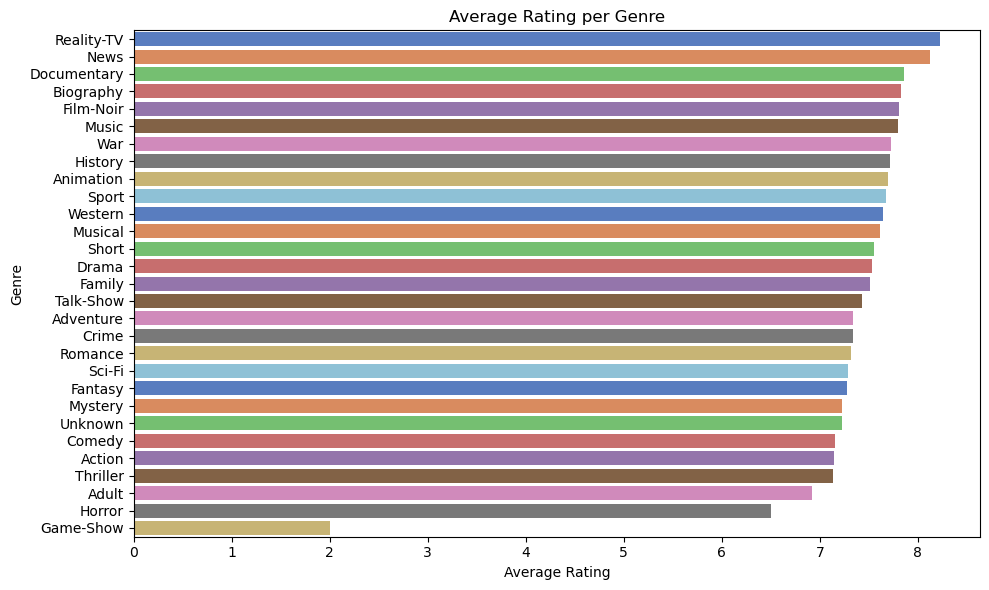

In [52]:
avg_rating_genre = df_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_genre.values, y=avg_rating_genre.index, palette='muted')
plt.title("Average Rating per Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### Average Rating per Release Year

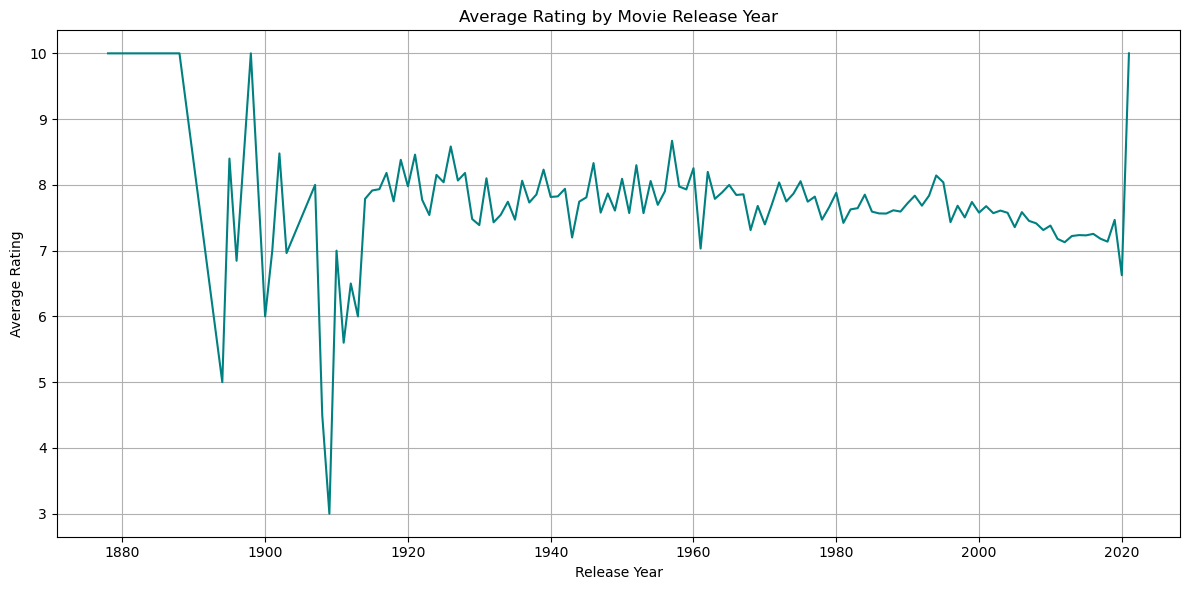

In [54]:
avg_rating_release_year = df_exploded.groupby('release_year')['rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_release_year.index, y=avg_rating_release_year.values, color='teal')
plt.title("Average Rating by Movie Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

### Number of Ratings by Genre and Year

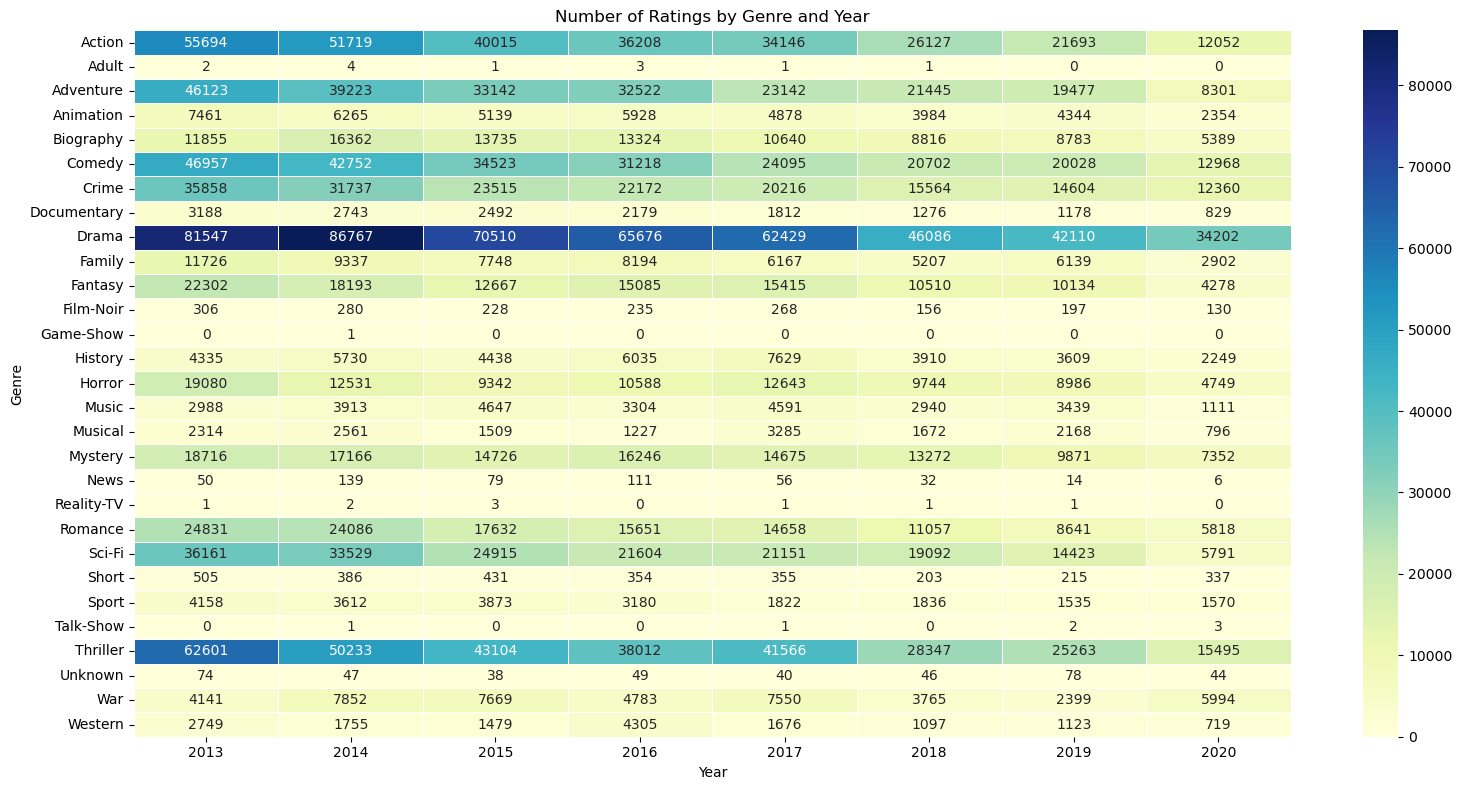

In [56]:
heatmap_data = df_exploded.pivot_table(index='genres', columns='rating_year', values='rating', aggfunc='count', fill_value=0)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title("Number of Ratings by Genre and Year")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### Genre Trends/Popularity Over Time

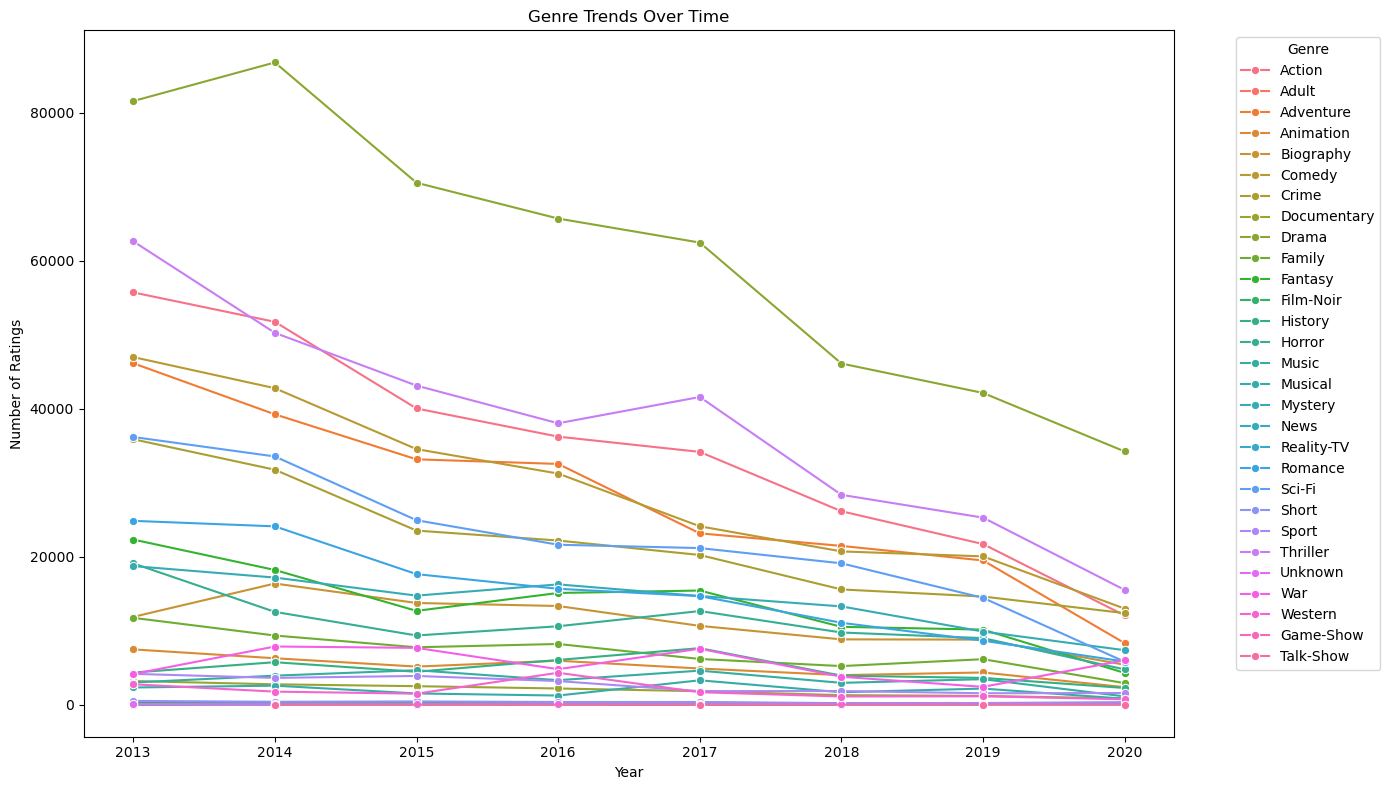

In [58]:
# Count number of ratings per genre per year
genre_year_trend = df_exploded.groupby(['rating_year', 'genres']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_year_trend, x='rating_year', y='count', hue='genres', marker='o')
plt.title("Genre Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Top 10 Most Rated Movies

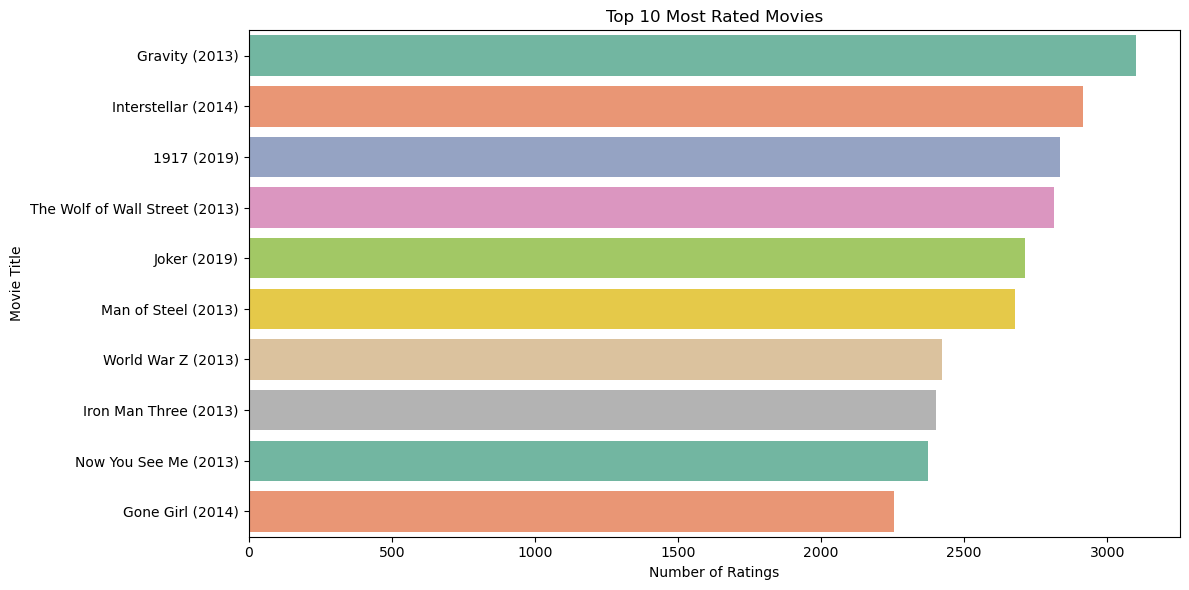

In [60]:
top_movies = df['movie_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='Set2')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

### 10 Top-Rated Movies 

In [62]:
top_movies = df.groupby('movie_title').agg(
    rating_count=('rating', 'count'),
    avg_rating=('rating', 'mean')
).query('rating_count >= 10').sort_values(by='avg_rating', ascending=False).head(10)

print(top_movies)

                                                    rating_count  avg_rating
movie_title                                                                 
MSG 2 the Messenger (2015)                                    48   10.000000
Five Minutes (2017)                                           22   10.000000
Selam (2013)                                                  10   10.000000
Avengers: Age of Ultron Parody (2015)                         28   10.000000
Be Somebody (2016)                                           353    9.985836
Birlesen Gonuller (2014)                                      17    9.882353
The Sky Is Pink (2019)                                        22    9.454545
Bridegroom (2013)                                             14    9.428571
Dag II (2016)                                                 36    9.416667
The Phantom of the Opera at the Royal Albert Ha...            10    9.400000


### 10 Lowest Rated Movies

In [64]:
lowrated_movies = df.groupby('movie_title').agg(
    rating_count=('rating', 'count'),
    avg_rating=('rating', 'mean')
).query('rating_count >= 10').sort_values(by='avg_rating').head(10)

print(lowrated_movies)

                              rating_count  avg_rating
movie_title                                           
Kod Adi K.O.Z. (2015)                   30    1.000000
The Rat (2019)                          96    1.729167
Disaster Movie (2008)                   18    1.888889
Thunderheart (1992)                     15    2.133333
Keith Lemon: The Film (2012)            21    2.142857
Dragonball Evolution (2009)             19    2.157895
Gallowwalkers (2012)                    26    2.269231
Battlefield Earth (2000)                17    2.352941
Apartment 1303 3D (2012)                23    2.434783
Reis (2016)                             36    2.500000
